In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v2_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().TrigObj
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().TrigObj

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo1DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [5]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['pt', 'eta', 'phi', 'l1pt', 'l1pt_2', 'l2pt', 'id', 'l1iso', 'l1charge', 'filterBits']


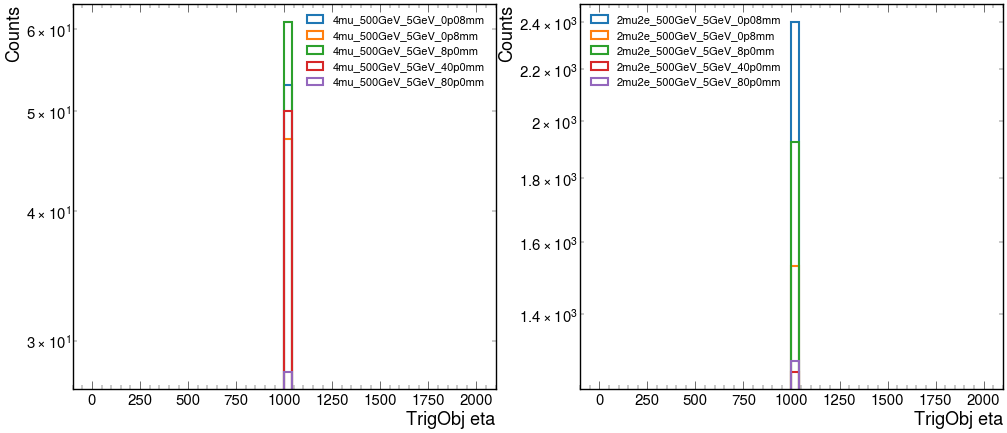

In [37]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    
    test1 = ((events_4mu[i_4mu].pt > 1023) & (events_4mu[i_4mu].pt < 1024))
    test2 = ((events_2mu2e[i_2mu].pt > 1023) & (events_2mu2e[i_2mu].pt < 1024))
    
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pt[test1]), range=(0,2000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pt[test2]), range=(0,2000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
#ax[0].set_xlim(2040,2060)
#ax[1].set_xlim(2040,2060)
ax[0].set_xlabel('TrigObj eta')
ax[1].set_xlabel('TrigObj eta')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)

## eta (spike around 1000)

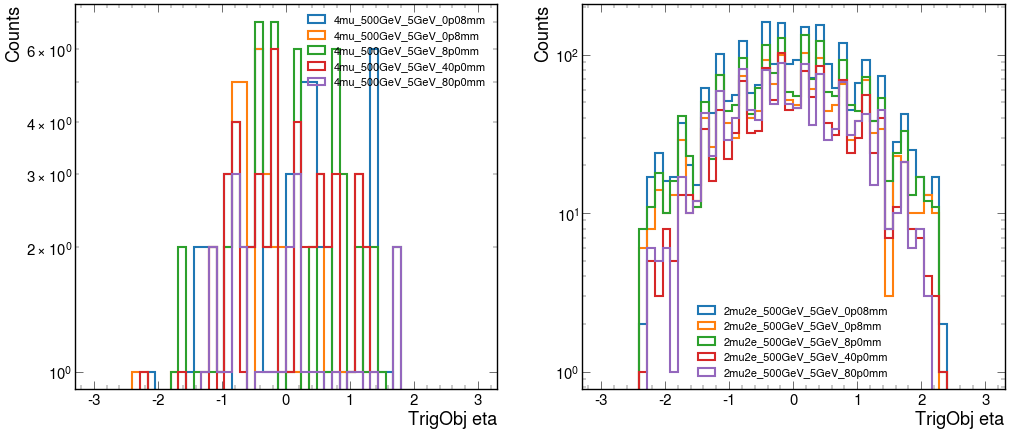

In [31]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    
    test1 = ((events_4mu[i_4mu].pt > 1023) & (events_4mu[i_4mu].pt < 1024))
    test2 = ((events_2mu2e[i_2mu].pt > 1023) & (events_2mu2e[i_2mu].pt < 1024))
    
    ax[0].hist(ak.flatten(events_4mu[i_4mu].eta[test1]), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].eta[test2]), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
#ax[0].set_xlim(2040,2060)
#ax[1].set_xlim(2040,2060)
ax[0].set_xlabel('TrigObj eta')
ax[1].set_xlabel('TrigObj eta')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)

plt.savefig("../Plots/V2/TrigObj_spike/eta.png", bbox_inches="tight")

4mu pdgId structure: [[182, 185, 181, 190, 184, 190, 263, 246, ... 170, 164, 33, 156, 161, 175, 238, 219]]
2mu2e pdgId structure: [[25.5, 154], [239, 239, 6.39, 234, ... 41.8, 144, 212, 2.05e+03, 144, 194, 185]]
4mu pdgId structure: [[99.4, 90.1, 132, 132, 161, 132, 230, 189, ... [125, 221, 83.9, 233, 135, 221, 210]]
2mu2e pdgId structure: [[110, 109, 110, 198, 109, 204, 192], ... [158, 56.7, 159, 157, 159, 270, 215]]
4mu pdgId structure: [[119, 120, 133, 122, 155, 120, 158], [], ... 147, 233], [163], [155, 17.2, 155]]
2mu2e pdgId structure: [[120, 97.3, 272, 2.05e+03, 120, 217], ... [198, 105, 281, 2.05e+03, 125, 261]]
4mu pdgId structure: [[187, 187], [], [], [], [190, 60.3, 181, ... [178, 179, 178], [], [5.35, 133], []]
2mu2e pdgId structure: [[40.8, 2.05e+03], [170, 169, 7.35, 175, ... 36.7, 164, 162, 199], [300, 2.05e+03]]
4mu pdgId structure: [[], [], [], [], [120, 120, 120], [], [], ... [], [], [], [], [], [830], [], []]
2mu2e pdgId structure: [[], [], [306, 2.05e+03], [255, 61.

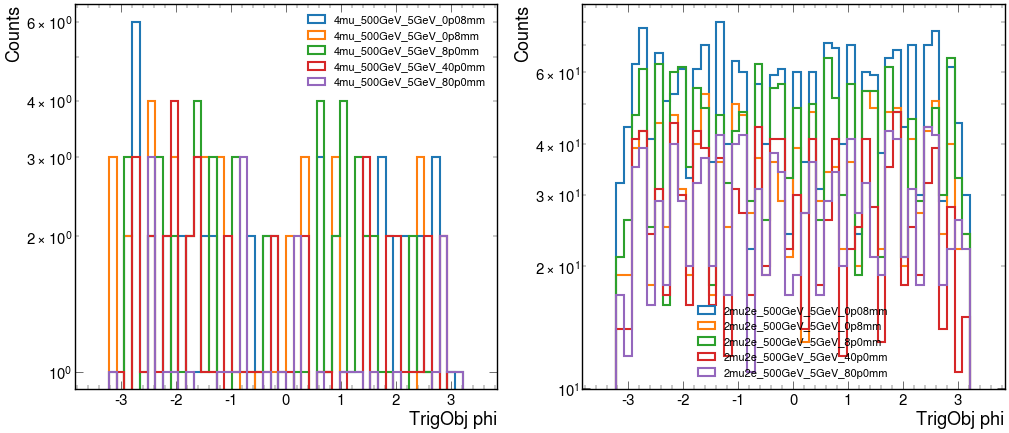

In [32]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pdgId", events_4mu[i_4mu].pt, events_2mu2e[i_2mu].pt)
    
    test1 = ((events_4mu[i_4mu].pt > 1023) & (events_4mu[i_4mu].pt < 1024))
    test2 = ((events_2mu2e[i_2mu].pt > 1023) & (events_2mu2e[i_2mu].pt < 1024))
    
    ax[0].hist(ak.flatten(events_4mu[i_4mu].phi[test1]), range=(-3.5,3.5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].phi[test2]), range=(-3.5,3.5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
#ax[0].set_xlim(2040,2060)
#ax[1].set_xlim(2040,2060)
ax[0].set_xlabel('TrigObj phi')
ax[1].set_xlabel('TrigObj phi')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)

plt.savefig("../Plots/V2/TrigObj_spike/phi.png", bbox_inches="tight")

## l1pt

4mu pdgId structure: [[72.5, 140, 72.5, 140, 72.5, 140, 0, 10, ... 96.5, 32.5, 32.5, 96.5, 25, 15, 25]]
2mu2e pdgId structure: [[18.5, 122], [7, 7, 7, 7, ... 76.5, 76.5, 76.5, 1.02e+03, 2.04e+03, 5.5, 256, 5.5]]
4mu pdgId structure: [[130, 130, 57.5, 57.5, 130, 40, 40, 17.5], ... [24.5, 140, 24.5, 140, 24.5, 10, 10]]
2mu2e pdgId structure: [[72, 72, 72, 162, 6.5, 162, 6.5], ... [64.5, 64.5, 64.5, 64.5, 11.5, 8, 11.5]]
4mu pdgId structure: [[64.5, 64.5, 8, 64.5, 24.5, 6.5, 24.5], [], ... 0, 15], [20.5], [16, 16, 0]]
2mu2e pdgId structure: [[8, 8, 1.02e+03, 2.04e+03, 6.5, 6.5], ... [256, 128, 1.02e+03, 2.04e+03, 0, 238]]
4mu pdgId structure: [[255, 0], [], [], [], [255, 255, 255], ... [], [50, 50, 23.5], [], [0, 30], []]
2mu2e pdgId structure: [[0, 2.04e+03], [7.5, 7.5, 7.5, 7.5, 0], ... 45, 45, 45, 0, 0], [1.02e+03, 2.04e+03]]
4mu pdgId structure: [[], [], [], [], [62, 62, 0], [], [], [63.5, ... [], [], [], [], [], [22], [], []]
2mu2e pdgId structure: [[], [], [1.02e+03, 2.04e+03], ... 

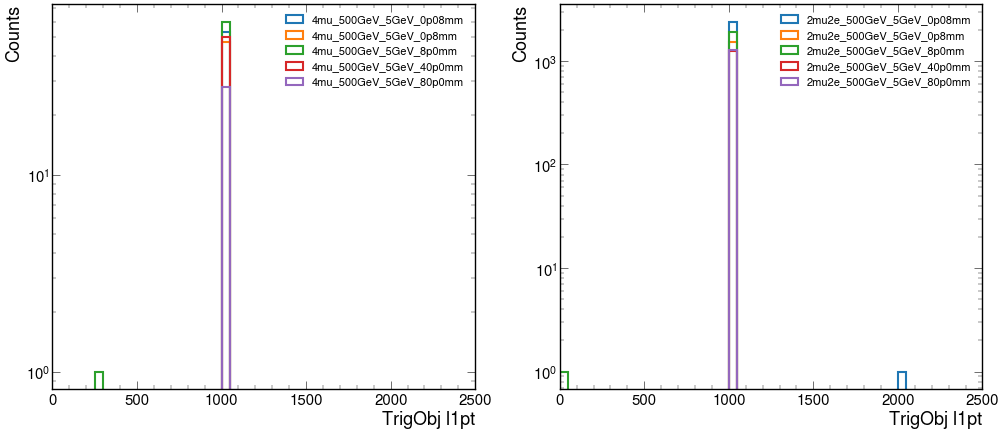

In [33]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pdgId", events_4mu[i_4mu].l1pt, events_2mu2e[i_2mu].l1pt)
    
    test1 = ((events_4mu[i_4mu].pt > 1023) & (events_4mu[i_4mu].pt < 1024))
    test2 = ((events_2mu2e[i_2mu].pt > 1023) & (events_2mu2e[i_2mu].pt < 1024))
    
    ax[0].hist(ak.flatten(events_4mu[i_4mu].l1pt[test1]), range=(0,2500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].l1pt[test2]), range=(0,2500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,2500)
ax[1].set_xlim(0,2500)
ax[0].set_xlabel('TrigObj l1pt')
ax[1].set_xlabel('TrigObj l1pt')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)

plt.savefig("../Plots/V2/TrigObj_spike/l1pt.png", bbox_inches="tight")

## l1pt_2

4mu pdgId structure: [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, ... 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]
2mu2e pdgId structure: [[0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], ... 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
4mu pdgId structure: [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, ... 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
2mu2e pdgId structure: [[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ... 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
4mu pdgId structure: [[0, 0, 0, 0, 0, 0, 0], [], [0, 0, 0, 0, 0, ... 0, 0, 0, 0, 0, 0, 0], [0], [0, 0, 0]]
2mu2e pdgId structure: [[0, 0, 0, 0, 0, 0], [0, 0], [0], [0, 0, ... [], [0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
4mu pdgId structure: [[0, 0], [], [], [], [0, 0, 0], [0, 0, 0, ... [], [], [], [0, 0, 0], [], [0, 0], []]
2mu2e pdgId structure: [[0, 0], [0, 0, 0, 0, 0], [0], [0], [0, ... [], [0, 0], [0, 0, 0, 0, 0, 0], [0, 0]]
4mu pdgId structure: [[], [], [], [], [0, 0, 0], [], [], [0, 0, ... [], [], [], [], [], [], [0], [], []]
2mu2e pdgId structure: [[], [], [0, 0], [0

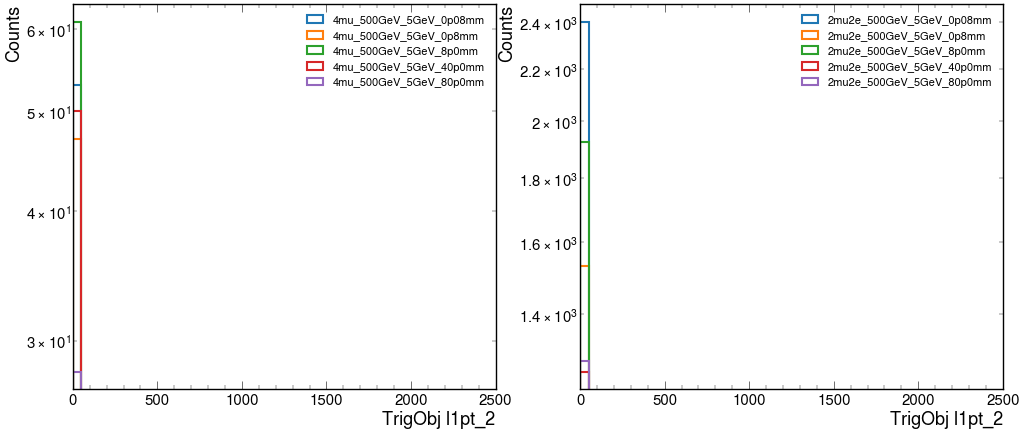

In [34]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pdgId", events_4mu[i_4mu].l1pt_2, events_2mu2e[i_2mu].l1pt_2)
    
    test1 = ((events_4mu[i_4mu].pt > 1023) & (events_4mu[i_4mu].pt < 1024))
    test2 = ((events_2mu2e[i_2mu].pt > 1023) & (events_2mu2e[i_2mu].pt < 1024))
    
    ax[0].hist(ak.flatten(events_4mu[i_4mu].l1pt_2[test1]), range=(0,2500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].l1pt_2[test2]), range=(0,2500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,2500)
ax[1].set_xlim(0,2500)
ax[0].set_xlabel('TrigObj l1pt_2')
ax[1].set_xlabel('TrigObj l1pt_2')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)

plt.savefig("../Plots/V2/TrigObj_spike/l1pt_2.png", bbox_inches="tight")

## l2pt

4mu pdgId structure: [[184, 104, 184, 104, 184, 104, 0, 0], ... [32.7, 162, 32.7, 32.7, 162, 0, 0, 0]]
2mu2e pdgId structure: [[18.6, 0], [6.67, 6.67, 6.67, 6.67, 218, ... 46.8, 46.8, 46.8, 212, 212, 0, 0, 0]]
4mu pdgId structure: [[96.4, 96.4, 100, 100, 96.4, 0, 0, 0], ... 0], [750, 5.31, 750, 5.31, 750, 0, 0]]
2mu2e pdgId structure: [[102, 102, 102, 0, 0, 0, 0], [0, 1.54e+03, ... 0, 0], [146, 146, 146, 146, 0, 0, 0]]
4mu pdgId structure: [[92, 92, 154, 92, 0, 0, 0], [], [34.9, ... 160, 14.7, 0, 0], [141], [10.9, 10.9, 0]]
2mu2e pdgId structure: [[82.9, 82.9, 238, 272, 0, 0], [260, 287], ... 0, 0, 0], [0, 118, 288, 281, 0, 0]]
4mu pdgId structure: [[142, 0], [], [], [], [80.5, 80.5, 80.5], ... [230, 230, 0], [], [4.48, 186], []]
2mu2e pdgId structure: [[40.1, 325], [8.91, 8.91, 8.91, 8.91, 0], ... 31.7, 31.7, 31.7, 0, 0], [278, 300]]
4mu pdgId structure: [[], [], [], [], [118, 118, 0], [], [], ... [], [], [], [], [], [21.8], [], []]
2mu2e pdgId structure: [[], [], [256, 306], [239, 71

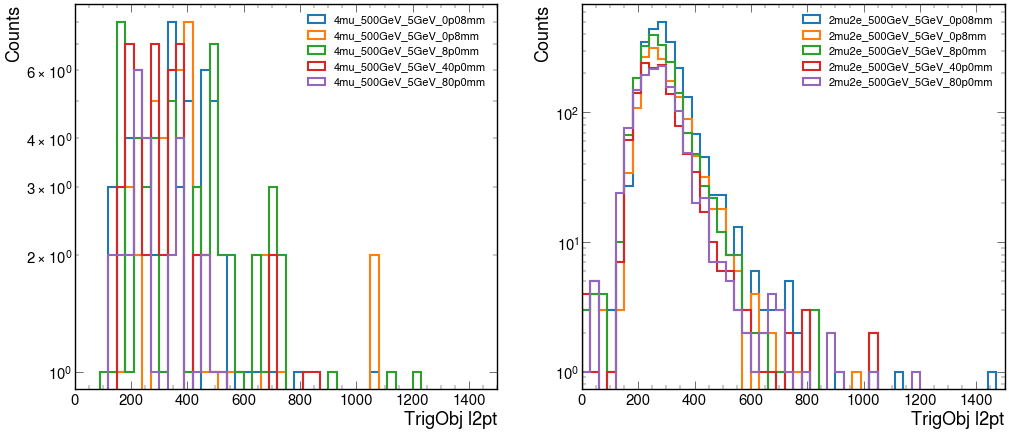

In [35]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pdgId", events_4mu[i_4mu].l2pt, events_2mu2e[i_2mu].l2pt)
    
    test1 = ((events_4mu[i_4mu].pt > 1023) & (events_4mu[i_4mu].pt < 1024))
    test2 = ((events_2mu2e[i_2mu].pt > 1023) & (events_2mu2e[i_2mu].pt < 1024))
    
    ax[0].hist(ak.flatten(events_4mu[i_4mu].l2pt[test1]), range=(0,1500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].l2pt[test2]), range=(0,1500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,1500)
ax[1].set_xlim(0,1500)
ax[0].set_xlabel('TrigObj l2pt')
ax[1].set_xlabel('TrigObj l2pt')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)

plt.savefig("../Plots/V2/TrigObj_spike/l2pt.png", bbox_inches="tight")

## id

4mu pdgId structure: [[13, 13, 13, 13, 13, 13, 15, 15], [13, ... 15], [13, 13, 13, 13, 13, 15, 15, 15]]
2mu2e pdgId structure: [[13, 15], [13, 13, 13, 13, 1, 1, 3, 15, ... [11, 13, 13, 13, 13, 1, 3, 15, 15, 15]]
4mu pdgId structure: [[13, 13, 13, 13, 13, 15, 15, 15], [13, ... 15, 15], [13, 13, 13, 13, 13, 15, 15]]
2mu2e pdgId structure: [[13, 13, 13, 15, 15, 15, 15], [11, 13, 1, ... 15, 15], [13, 13, 13, 13, 15, 15, 15]]
4mu pdgId structure: [[13, 13, 13, 13, 15, 15, 15], [], [13, 13, ... 13, 13, 15, 15], [13], [13, 13, 15]]
2mu2e pdgId structure: [[13, 13, 1, 3, 15, 15], [1, 3], [11], ... [13, 15, 15, 15], [11, 13, 1, 3, 15, 15]]
4mu pdgId structure: [[13, 15], [], [], [], [13, 13, 13], [13, ... [], [], [13, 13, 15], [], [13, 13], []]
2mu2e pdgId structure: [[1, 3], [13, 13, 13, 13, 15], [3], [3, ... [1, 3], [13, 13, 13, 13, 15, 15], [1, 3]]
4mu pdgId structure: [[], [], [], [], [13, 13, 15], [], [], [13, ... [], [], [], [], [], [], [13], [], []]
2mu2e pdgId structure: [[], [], [1, 3]

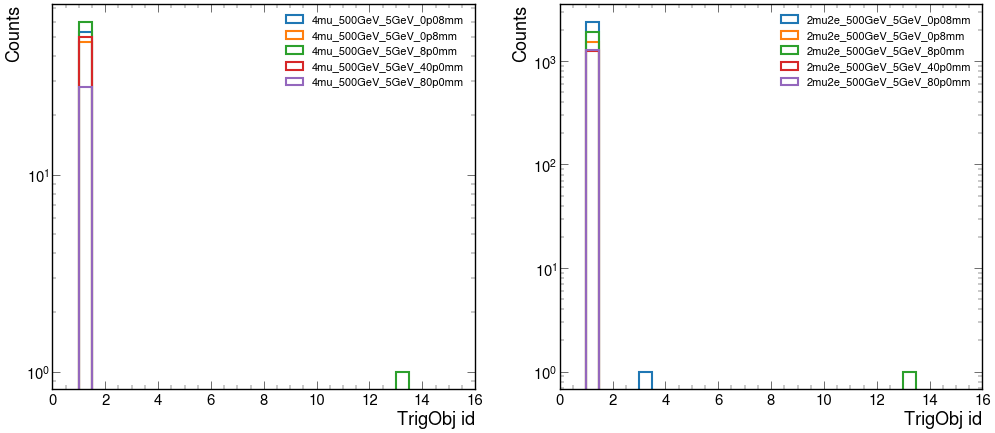

In [36]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pdgId", events_4mu[i_4mu].id, events_2mu2e[i_2mu].id)
    
    test1 = ((events_4mu[i_4mu].pt > 1023) & (events_4mu[i_4mu].pt < 1024))
    test2 = ((events_2mu2e[i_2mu].pt > 1023) & (events_2mu2e[i_2mu].pt < 1024))
    
    ax[0].hist(ak.flatten(events_4mu[i_4mu].id[test1]), range=(0,16), alpha=1, bins=32, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].id[test2]), range=(0,16), alpha=1, bins=32, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,16)
ax[1].set_xlim(0,16)
ax[0].set_xlabel('TrigObj id')
ax[1].set_xlabel('TrigObj id')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)

plt.savefig("../Plots/V2/TrigObj_spike/id.png", bbox_inches="tight")